In [1]:
#imports
import pandas as pd
import numpy as np
import time
import nltk, sklearn, scipy
import visualization, word2vec #local files with visualization functions
from IPython import display

In [2]:
start = time.time()

In [3]:
#config
pd.options.mode.chained_assignment = None 

In [4]:
#parameters
PERMITTED_PoS = ['JJ', 'NN', 'NNS', 'NNP', 'VBP']
INPUT_FILE = '../extreme right antisemitism _ new.csv'
INPUT_COLUMN = 'Post'
DATE_COLUMN = 'Date'
COMPARE_WORDS = ['zog', 'kike', 'george_soros', 'rothschild']
MAX_LENGTH = 11 #max length for a word

lemmatizer = nltk.stem.WordNetLemmatizer()
df = pd.read_csv(INPUT_FILE)
start_date = pd.to_datetime('2022-12-24')

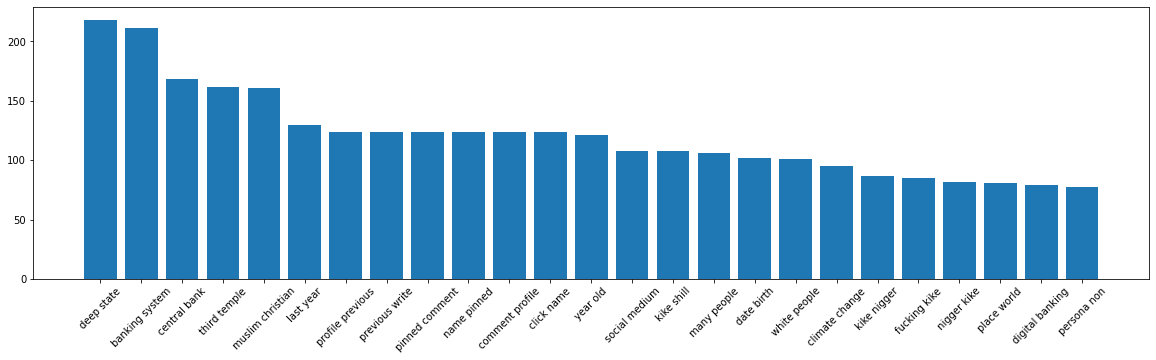

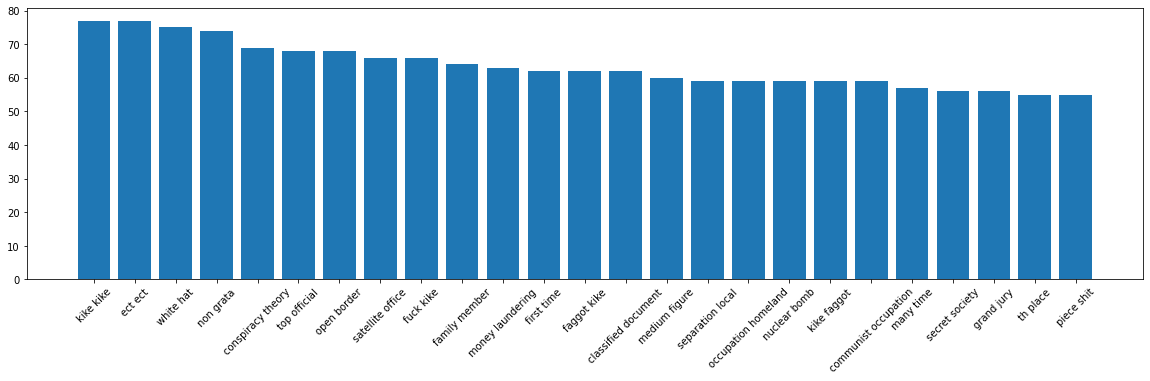

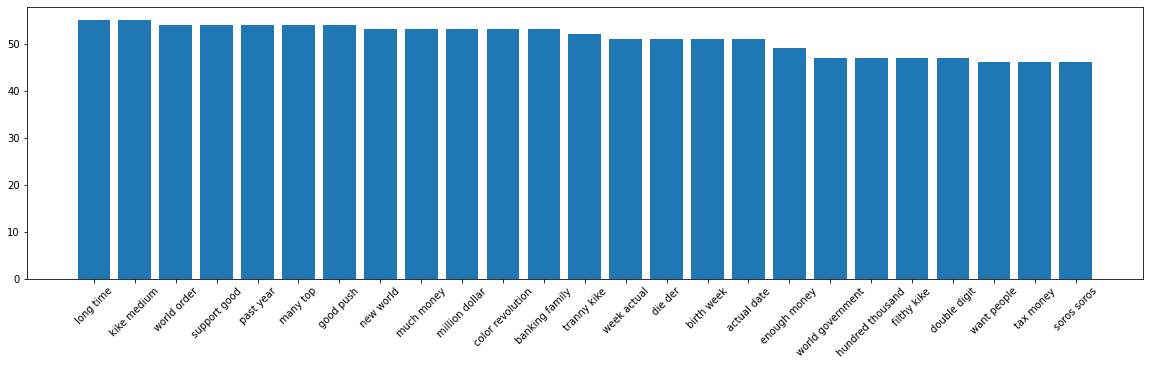

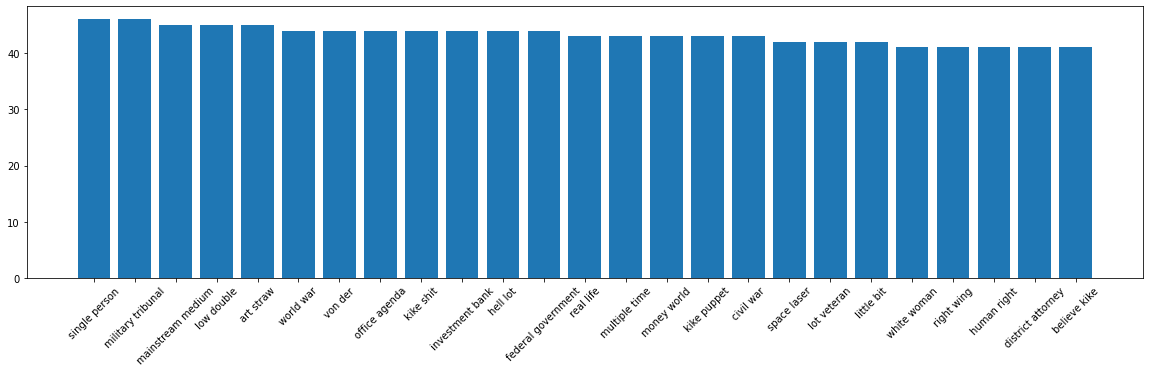

In [5]:
#find bigrams
n = 2
vectorizer = sklearn.feature_extraction.text.TfidfVectorizer(ngram_range=(n, n))
bigrams, df = visualization.find_and_visualize(df, start_date, INPUT_COLUMN, DATE_COLUMN, lemmatizer, 
                                                 PERMITTED_PoS, MAX_LENGTH, n, vectorizer)

In [6]:
#word2vec calculations
similarity_df = word2vec.get_similarities(df, start_date, INPUT_COLUMN, DATE_COLUMN, bigrams, 
                    COMPARE_WORDS, lemmatizer, PERMITTED_PoS, MAX_LENGTH)

In [7]:
#determination of antisemitism
def is_antisemitic(x: pd.Series, df: pd.DataFrame, num: int) -> bool:
    '''Determine if an example is antisemitic: if it is in the top 20% closest in general or top 10% on one column.'''
    return x[num] > np.percentile(df.iloc[:, num], 80) or any([x[i] > np.percentile(df.iloc[:, i], 90) for i in range(num)])

similarity_df['Classification'] = similarity_df.apply(lambda x: is_antisemitic(x, similarity_df, len(COMPARE_WORDS)), axis=1)
similarity_df.to_csv('output.csv')

In [8]:
end = time.time()
elapsed = end-start
minutes, seconds = elapsed / 60, elapsed % 60
print(f'Elapsed time: {minutes:.0f} minutes, {seconds:.1f} seconds.')

Elapsed time: 2 minutes, 59.5 seconds.


In [9]:
#display
display.HTML(similarity_df.sort_values(['Classification', 'Mean'], ascending=False).to_html())

,zog,kike,george_soros,rothschild,Mean,Classification
fucking_kike,0.522550,0.775427,0.262429,0.287144,0.461887,True
filthy_kike,0.529125,0.717613,0.287988,0.250600,0.446331,True
kike_faggot,0.516526,0.731970,0.228768,0.246120,0.430846,True
double_digit,0.508290,0.606817,0.292020,0.302101,0.427307,True
faggot_kike,0.474439,0.704318,0.277885,0.240449,0.424273,True
fuck_kike,0.525300,0.748787,0.194525,0.226398,0.423752,True
piece_shit,0.472768,0.632598,0.274688,0.229357,0.402353,True
kike_shill,0.473149,0.665586,0.246519,0.155338,0.385148,True
kike_nigger,0.474641,0.687419,0.180410,0.179893,0.380591,True
single_person,0.392694,0.529467,0.334420,0.262691,0.379818,True
